In [1]:
import gc
import os
import time
import warnings
from collections import Counter

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import wordcloud
from tqdm import tqdm

import dash
from dash.dependencies import Input, Output, Event
import plotly
import plotly.graph_objs as go

warnings.filterwarnings('ignore')
tqdm.pandas()
sns.set_style('whitegrid')

In [2]:
BASE_PATH = 'C:\\Projects\\Python_projects\\Covid19_Analysis\\twitter_db'

In [3]:
csv_list = os.listdir(f'{BASE_PATH}\\kaggle_data')
csv_list

['COVID19_line_list_data.csv',
 'COVID19_open_line_list.csv',
 'covid_19_data.csv',
 'time_series_covid_19_confirmed.csv',
 'time_series_covid_19_confirmed_US.csv',
 'time_series_covid_19_deaths.csv',
 'time_series_covid_19_deaths_US.csv',
 'time_series_covid_19_recovered.csv']

In [4]:
covid_data = pd.read_csv(f"{BASE_PATH}\\kaggle_data\\covid_19_data.csv")

In [9]:
covid_data.shape, covid_data.columns

((10358, 8),
 Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
        'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
       dtype='object'))

In [5]:
covid_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [16]:
covid_data["ObservationDate"] = pd.to_datetime(covid_data["ObservationDate"])
covid_data["Last Update"] = pd.to_datetime(covid_data["Last Update"])

In [6]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10358 entries, 0 to 10357
Data columns (total 8 columns):
SNo                10358 non-null int64
ObservationDate    10358 non-null object
Province/State     5578 non-null object
Country/Region     10358 non-null object
Last Update        10358 non-null object
Confirmed          10358 non-null float64
Deaths             10358 non-null float64
Recovered          10358 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 647.5+ KB


In [136]:
cl_list = [k for k, _ in Counter(covid_data["Country/Region"]).most_common(150)]

In [150]:
dff =covid_data[covid_data["Country/Region"] == cl_list[1]].groupby("ObservationDate").agg({"Confirmed":"sum", "Deaths": "sum", "Recovered": "sum"}).reset_index()

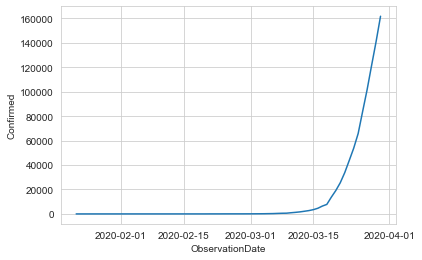

In [151]:
sns.lineplot(x=dff["ObservationDate"], y=dff["Confirmed"])